ecosysteme
==========

Rappel pip
----------
- Windows
  - conda install package
  - pip install package
- Linux et Mac
  - pip install --user package
  
  
Numpy (+scipy)
--------------
http://mathesaurus.sourceforge.net/matlab-python-xref.pdf

Numpy :
- ```ndarray``` : un tableaux d'un dtype unique **beaucoup** plus performants que les listes python
- **mutable**
- ```dtype``` : type en numpy
- indexation et slicing : possibilité d'utiliser
  - une liste d'entier par dimension
  - un tableau d'index
  - un masque
- ```shape``` : forme d'un tableau
- creation :
  - ```empty``` : creation rapide mais sans initialisation
  - ```zeros```, ```zeros_like```, ```ones```, ```ones_like``` : creation avec initialisation à 0 ou 1
  - ```arange(debut, fin, pas)```
  - ```linspace(debut, fin, nb de points)```
  - ```meshgrid``` : maillage
- produit matriciel : ```@```
- **Beaucoup** de paquets utilisent cette structure de donnée
- utiliser ```&``` et ```|``` au lieu de ```and``` et ```or```
- quelques fonctions utiles  (survol)
  - ```linalg.eigvals``` : valeurs propres
  - ```linalg.det``` : determinant
  - ```linalg.solve``` : resoud Ax = b
  - ```linalg.inv``` : inverse une matrice
  - ```sort``` : tri
  - ```where``` : recherche
  - ```median```, ```average```, ```std```,```var``` : statistiques classiques
  - ```cov``` : matrice covariante
  - ```histogram``` : histogram
  
scipy :
- Plein de constantes
- **Plein** de fonctions utiles (survol)
  - ```fft```, ```dct```, ```dst``` : fourrier
  - ```quad```, ```simps```, ```odr``` : integration
  - ```solve_ivp```, ```solve_bvp``` : ODE solver
  - ```griddata```, ```make_interp_spline``` : interpolation
  - ```solve```, ```inv```, ```det```, ```eigvals``` : linalg variant
  - ```lu```, ```svd``` : more linalg
  - ```convolve```, ```correlate```, ```gaussian_filter```,```spline_filter``` : filtres
  - ```binary_closing```, ```binary_dilatation```, ```binary_erosion``` : morphologie
  - ```minimize```, ```leastsq```, ```root```, ```fsolve``` : optimisation et recherche de zeros
  - ```find_peaks_cwt```, ```spectrogram``` : traitement du signal
  - ```lu```, ```csr``` : matrices creuses
  - ```bicg```, ```gmres```, ```splu``` : sparse linalg
  - ```shortest_path``` : calcul sur graph
  - ```KDTree```, ```Delaunay```, calcul spatial
  - ```gauss```, ```laplace```, ```uniform```, ```binom``` : distributions de variables aléatoire
  - ```describe```, ```bayes_mvs``` : more statistics
  - ```airy```, ```jv```, ```erf```, ```fresnel``` : fonctions classiques
  
  
  
Matpotlib
---------
- Tout ce qu'il faut pour dessiner en python
  - 1d / 2d / 3d
  - fixe ou animé
  - statique ou interactif (mais plus statique)
- Très proche de la syntaxe matlab (trop ?)
- Très vaste (trop ?)
- Utilisez la gallerie https://matplotlib.org/gallery/index.html

Quelques exemples
-----------------

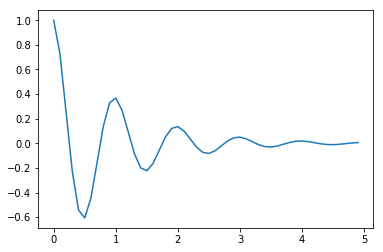

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def f(t):
  return np.exp(-t) * np.cos(2*np.pi*t)

t = np.arange(0.0, 5.0, 0.1)

plt.plot(t, f(t))
plt.show()

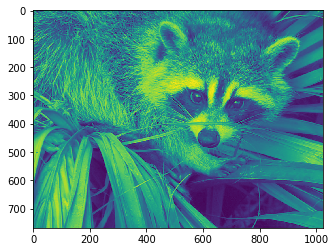

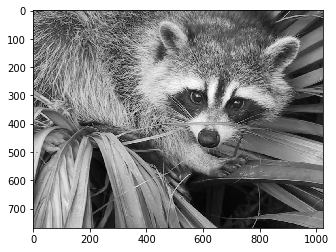

In [2]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
face = misc.face(gray=True)
plt.imshow(face)
plt.show()
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

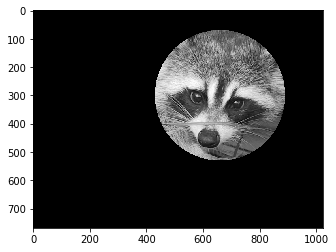

In [3]:
sy, sx = face.shape
y, x = np.mgrid[0:sy, 0:sx] # x and y indices of pixels

centerx, centery = (660, 300) # center of the image

mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # circle
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)    
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

data = np.loadtxt('populations.txt')
print(data)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


In [5]:
# Turn this into an exercice
year, hares, lynxes, carrots = data.T
populations = data[:,1:]

means = populations.mean(axis=0)
stds = populations.std(axis=0)
max_populations = np.argmax(populations, axis=0)
max_years = year[max_populations]
lowest_2_pop = np.argsort(populations, axis=0)[:2]
lowest_2_year = year[lowest_2_pop]

format_array = "{:<30} {:^10.5} | {:^10.5} | {:^10.5}"
print(format_array.format("", "Hares", "Lynxes", "Carrots"))
print(format_array.format("Mean:", *means))
print(format_array.format("Std:", *stds))
print(format_array.format("Max. year:",*max_years))

print(format_array.format("lowest populations year 1:", *lowest_2_year[0]))
print(format_array.format("lowest populations year 2:", *lowest_2_year[1]))

                                 Hares    |   Lynxe    |   Carro   
Mean:                          3.4081e+04 | 2.0167e+04 |  4.24e+04 
Std:                           2.0898e+04 | 1.6255e+04 |   3322.5  
Max. year:                       1903.0   |   1904.0   |   1900.0  
lowest populations year 1:       1917.0   |   1900.0   |   1916.0  
lowest populations year 2:       1916.0   |   1901.0   |   1903.0  


In [6]:
above_50000 = np.any(populations > 50000, axis=1)
print("Any above 50000:", year[above_50000])

Any above 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]


In [7]:
max_species = np.argmax(populations, axis=1)
species = np.array(['Hare', 'Lynx', 'Carrot'])

max_species=np.stack((year,species[max_species]),axis=1)
print("Max species:")
print(max_species)

Max species:
[['1900.0' 'Carrot']
 ['1901.0' 'Carrot']
 ['1902.0' 'Hare']
 ['1903.0' 'Hare']
 ['1904.0' 'Lynx']
 ['1905.0' 'Lynx']
 ['1906.0' 'Carrot']
 ['1907.0' 'Carrot']
 ['1908.0' 'Carrot']
 ['1909.0' 'Carrot']
 ['1910.0' 'Carrot']
 ['1911.0' 'Carrot']
 ['1912.0' 'Hare']
 ['1913.0' 'Hare']
 ['1914.0' 'Hare']
 ['1915.0' 'Lynx']
 ['1916.0' 'Carrot']
 ['1917.0' 'Carrot']
 ['1918.0' 'Carrot']
 ['1919.0' 'Carrot']
 ['1920.0' 'Carrot']]


diff(Hares) vs. Lynxes correlation -0.9179248480315341


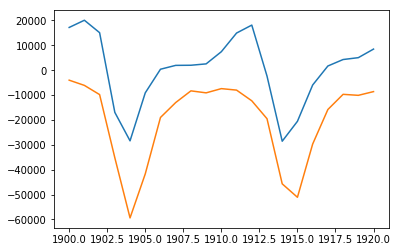

In [8]:
hare_grad = np.gradient(hares, 1.0)
print("diff(Hares) vs. Lynxes correlation", np.corrcoef(hare_grad, lynxes)[0,1])

plt.plot(year, hare_grad)
plt.plot(year, -lynxes)
plt.show()

scikits
------
'Plugins' for scipy
http://scikits.appspot.com/scikits
e.g. scikit-image

pillow
------
- lire/ecrire des images dans beaucoup de format

Opencv
------
- Traitement d'image


Quelques exemples
-----------------

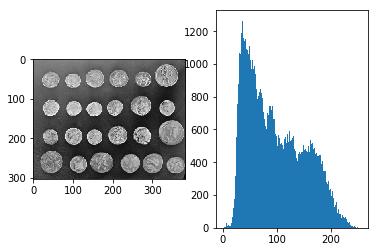

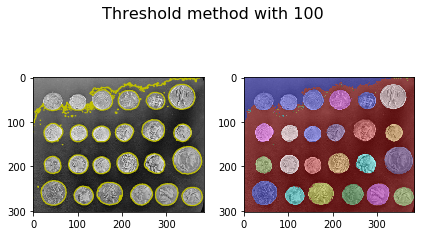

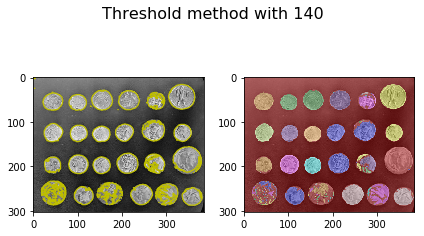

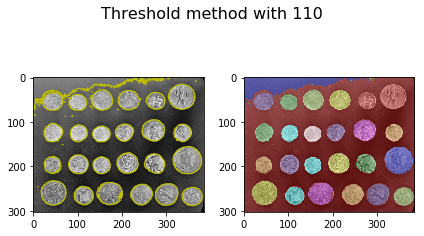

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import data
from skimage.color import label2rgb

# get data
coins = data.coins()

def plot_result(segmentation, title = ""):
    labeled_coins, _ = ndi.label(segmentation)
    image_label_overlay = label2rgb(labeled_coins, image=coins)
    
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(coins, cmap=plt.cm.gray)
    axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
    axes[1].imshow(image_label_overlay)
    if title:
        plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


def segmentation_with_threshold(datain, threshold):
    """ simple segmentation based on a threshold """
    return ndi.binary_fill_holes(datain>threshold)


# plot coins
fig, axes = plt.subplots(1,2)
axes[0].imshow(coins, cmap='gray')
axes[1].hist(coins.flatten(), bins=np.arange(0, 256))
plt.show()

# simple extraction based on threshold
for threshold in [100,140,110]:
    segmentation = segmentation_with_threshold(coins, threshold)
    plot_result(segmentation, "Threshold method with {}".format(threshold))

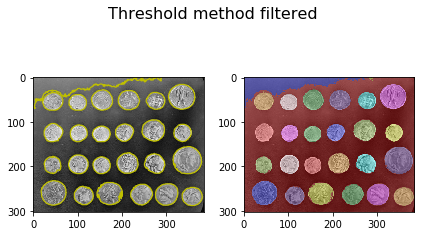

In [10]:
def filter_small_objects(datain, threshold):
    """ segmentation based on edges """
    # label each zone
    label_objects, nb_labels = ndi.label(datain)
    # size of each zone in pixel
    sizes = np.bincount(label_objects.ravel())
    # mask on all zone bigger than 20
    mask_sizes = sizes > threshold
    # remove the background
    mask_sizes[0] = False
      
    #apply filter
    return mask_sizes[label_objects]  

segmentation = segmentation_with_threshold(coins, 110)
segmentation = filter_small_objects(segmentation,20)
plot_result(segmentation, "Threshold method filtered")

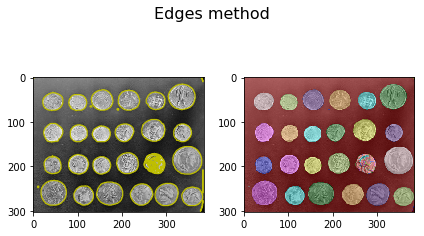

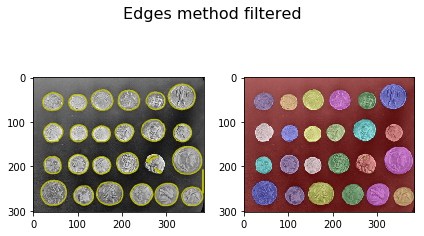

In [11]:
def segmentation_with_edges(datain):
    """ segmentation based on edges """
    from skimage.feature import canny
    return ndi.binary_fill_holes(canny(datain/255.))

segmentation = segmentation_with_edges(coins)
plot_result(segmentation, "Edges method")
segmentation = filter_small_objects(segmentation,20)
plot_result(segmentation, "Edges method filtered")

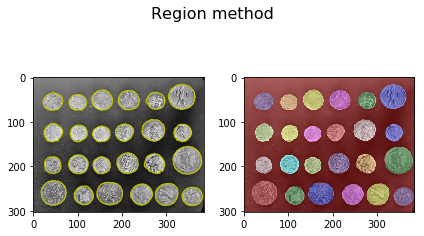

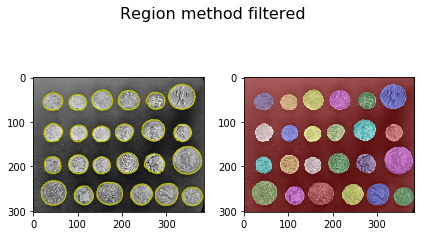

In [12]:
def segmentation_with_region(datain):
    """ segmentation based on region """
    from skimage.filters import sobel
    from skimage.morphology import watershed


    elevation_map = sobel(datain)
    
    markers = np.zeros_like(datain)
    # this is background for sure
    markers[datain < 30] = 1
    # this is coin for sure
    markers[datain > 150] = 2
    
    # apply watershed algo
    segmentation = watershed(elevation_map, markers) - 1
    return ndi.binary_fill_holes(segmentation)         

segmentation = segmentation_with_region(coins)
plot_result(segmentation, "Region method")
segmentation = filter_small_objects(segmentation,20)
plot_result(segmentation, "Region method filtered")

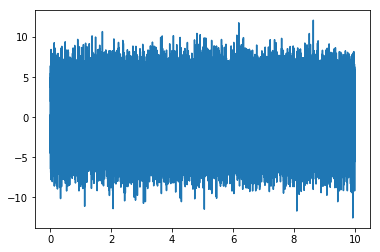

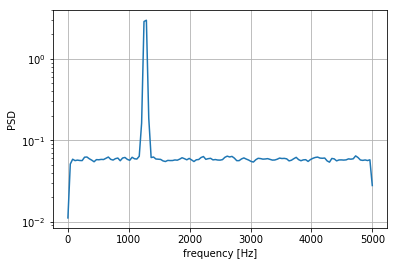

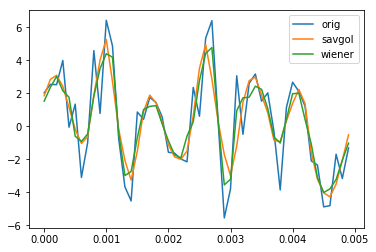

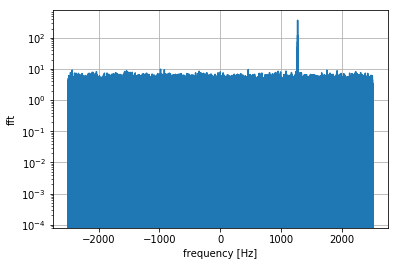

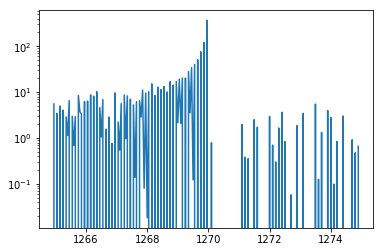

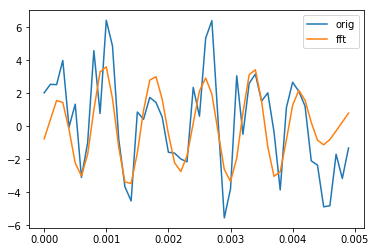

Energy : 0.4677969359434006


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack
from scipy import integrate

# exemple de traitement du signal
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.plot(time,x)
plt.show()

f, Pwelch_spec = signal.welch(x, fs, scaling='spectrum')
plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

plt.plot(time[:50],x[:50],label="orig")
plt.plot(time[:50],signal.savgol_filter(x,11,5)[:50],label="savgol")
plt.plot(time[:50],signal.wiener(x)[:50],label="wiener")
plt.legend()
plt.show()


spectre = fftpack.dct(x, norm='ortho')
xf = np.fft.fftfreq(int(N),2/fs)
plt.semilogy(xf, spectre)
plt.xlabel('frequency [Hz]')
plt.ylabel('fft')
plt.grid()
plt.show()
plt.semilogy(xf[25399-100:25399+100], spectre[25399-100:25399+100])
plt.show()

spectref = spectre.copy()
spectref[:25399-10000] = 0
spectref[25399+10000:] = 0
y = fftpack.idct(spectref, norm='ortho')
plt.plot(time[:50],x[:50],label="orig")
plt.plot(time[:50],y[:50],label="fft")
plt.legend()
plt.show()


energy = integrate.simps(x[:500]**2, x=time[:500])
print("Energy : {}".format(energy))

In [14]:
# Optimization ou EDO

sympy
-----
Calcul symbolique en python


f(x)
⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           
                      2               
         d           d                
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                


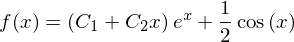

In [15]:
import sympy as sp
sp.init_printing()
x = sp.symbols('x')
f = sp.symbols('f', cls=sp.Function)
print(f(x))
sp.pprint(sp.Integral(sp.sqrt(1/x),x))
diffeq = sp.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sp.sin(x))
sp.pprint(diffeq)
sp.dsolve(diffeq, f(x))


pandas
------
- largement basé sur numpy
- permet de faire du traitement 'à la excel'

Autre
-----
.... ?